In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd ./drive/MyDrive/ms_asl

/content/drive/MyDrive/ms_asl


In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import msasldataset
import matplotlib.pyplot as plt
import numpy as np
from model import SqueezeNet
from torchvision.utils import make_grid
from train import train_epoch
import torch.nn as nn
import torch.optim as optim

In [4]:
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = msasldataset.ImageSequenceDataset(csv_file=r"./labels_int.csv", folder="./train_frames", transform=transform)

dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=1, pin_memory=True)

torch.Size([4, 3, 32, 224, 224])


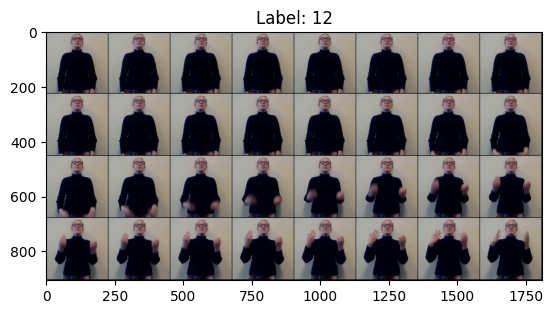

In [5]:
c = 0
for images, labels in dataloader:
    print(images.shape)
    plt.imshow(make_grid(images[0].permute(1, 0, 2, 3), nrow=8).permute((1,2,0)))
    plt.title(f"Label: {labels[0]}")
    plt.show()

    break

In [6]:
model = SqueezeNet(sample_size=224, sample_duration=32, version=1.1, num_classes=101)
model = model.cuda()

# for images, labels in dataloader:
#     optimizer = optim.SGD(
#             model.parameters(),
#             lr=0.01)
#     #print(images.shape)
#     output = model(images.cuda())
#     #print(output.shape)
#     #print(output)

#     criterion = nn.CrossEntropyLoss()

#     loss = criterion(output, labels.cuda())
#     print(loss.data)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     break

In [ ]:
# In the original paper lr is initialized to 0.1 and reduced by a factor of 1e-1
# 3 times, when validation loss converges
optimizer = optim.SGD(
            model.parameters(),
            lr=0.1,
            momentum=0.9,
            dampening=0.9,
            weight_decay=1e-3)

criterion = nn.CrossEntropyLoss()

train_epoch(epoch=0, data_loader=dataloader, model=model, criterion=criterion, optimizer=optimizer)

Epoch: 0, Loss: 7.463134288787842
Epoch: 0, Loss: 8.535542488098145
Epoch: 0, Loss: 9.55307388305664
Epoch: 0, Loss: 9.218873023986816
Epoch: 0, Loss: 10.148458480834961
Epoch: 0, Loss: 8.327943801879883
Epoch: 0, Loss: 6.185878753662109
Epoch: 0, Loss: 6.370678901672363
Epoch: 0, Loss: 5.3684306144714355
Epoch: 0, Loss: 4.787924766540527
Epoch: 0, Loss: 4.997772216796875
Epoch: 0, Loss: 4.911299705505371
Epoch: 0, Loss: 5.4438581466674805
Epoch: 0, Loss: 5.719978332519531
Epoch: 0, Loss: 6.17350959777832
Epoch: 0, Loss: 4.816753387451172
Epoch: 0, Loss: 5.94988489151001
Epoch: 0, Loss: 4.973214149475098
Epoch: 0, Loss: 5.457625389099121
Epoch: 0, Loss: 5.03428316116333
Epoch: 0, Loss: 4.7294135093688965
Epoch: 0, Loss: 5.020007133483887
Epoch: 0, Loss: 4.518502712249756
Epoch: 0, Loss: 5.135527610778809
Epoch: 0, Loss: 4.833209991455078
Epoch: 0, Loss: 5.704170227050781
Epoch: 0, Loss: 5.111583232879639
Epoch: 0, Loss: 4.609429836273193
Epoch: 0, Loss: 5.065470218658447


In [ ]:
EPOCHS = 15

for epoch in range(0, EPOCHS):

    l = train_epoch(epoch=epoch, data_loader=dataloader, model=model, criterion=criterion, optimizer=optimizer)

    torch.save({
        'epoch': epoch,
        'mode_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': l
    }, "model.pt")
